## Name : Swapnil Ajit Chhatre
## Roll no. : 33213
## Division : TE - 10
## Batch : L - 10

### Subject : Laboratory Practice 1 (Machine Learning)
### Group : A
### Assignment 3 : Binary Classification using Decision Tree

Every year many students give the GRE exam to get admission in foreign Universities. 
The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).

Admitted is the target variable. Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)

Dataset : https://www.kaggle.com/mohansacharya/graduate-admissions 

The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. 

So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not. 

A. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.

B. Perform data-preparation (Train-Test Split)

C. Apply Machine Learning Algorithm 

D. Evaluate Model.

## 1. Importing Libraries and Loading Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('E:\TE_IT_SEM_1\Lab_Practice\ML_Assignments\Admission_Predict.csv', index_col = "Serial No.")
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


## 2. Data Preprocessing

In [8]:
inputs = data.loc[:, 'GRE Score':'Research']

In [9]:
inputs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [10]:
data.iloc[data.iloc[:, -1] < 0.8, -1] = 0
data.iloc[data.iloc[:, -1] >= 0.8, -1] = 1

In [11]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1.0
2,324,107,4,4.0,4.5,8.87,1,0.0
3,316,104,3,3.0,3.5,8.00,1,0.0
4,322,110,3,3.5,2.5,8.67,1,1.0
5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,1.0
397,325,107,3,3.0,3.5,9.11,1,1.0
398,330,116,4,5.0,4.5,9.45,1,1.0


In [12]:
target = data.iloc[:, -1]

In [13]:
target

Serial No.
1      1.0
2      0.0
3      0.0
4      1.0
5      0.0
      ... 
396    1.0
397    1.0
398    1.0
399    0.0
400    1.0
Name: Chance of Admit , Length: 400, dtype: float64

## 3. Applying Machine Learning Algorithm

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(inputs, target, test_size = 0.2, random_state = 10)

In [16]:
from sklearn import tree

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [19]:
ypred = model.predict(xtest)
ypred

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.])

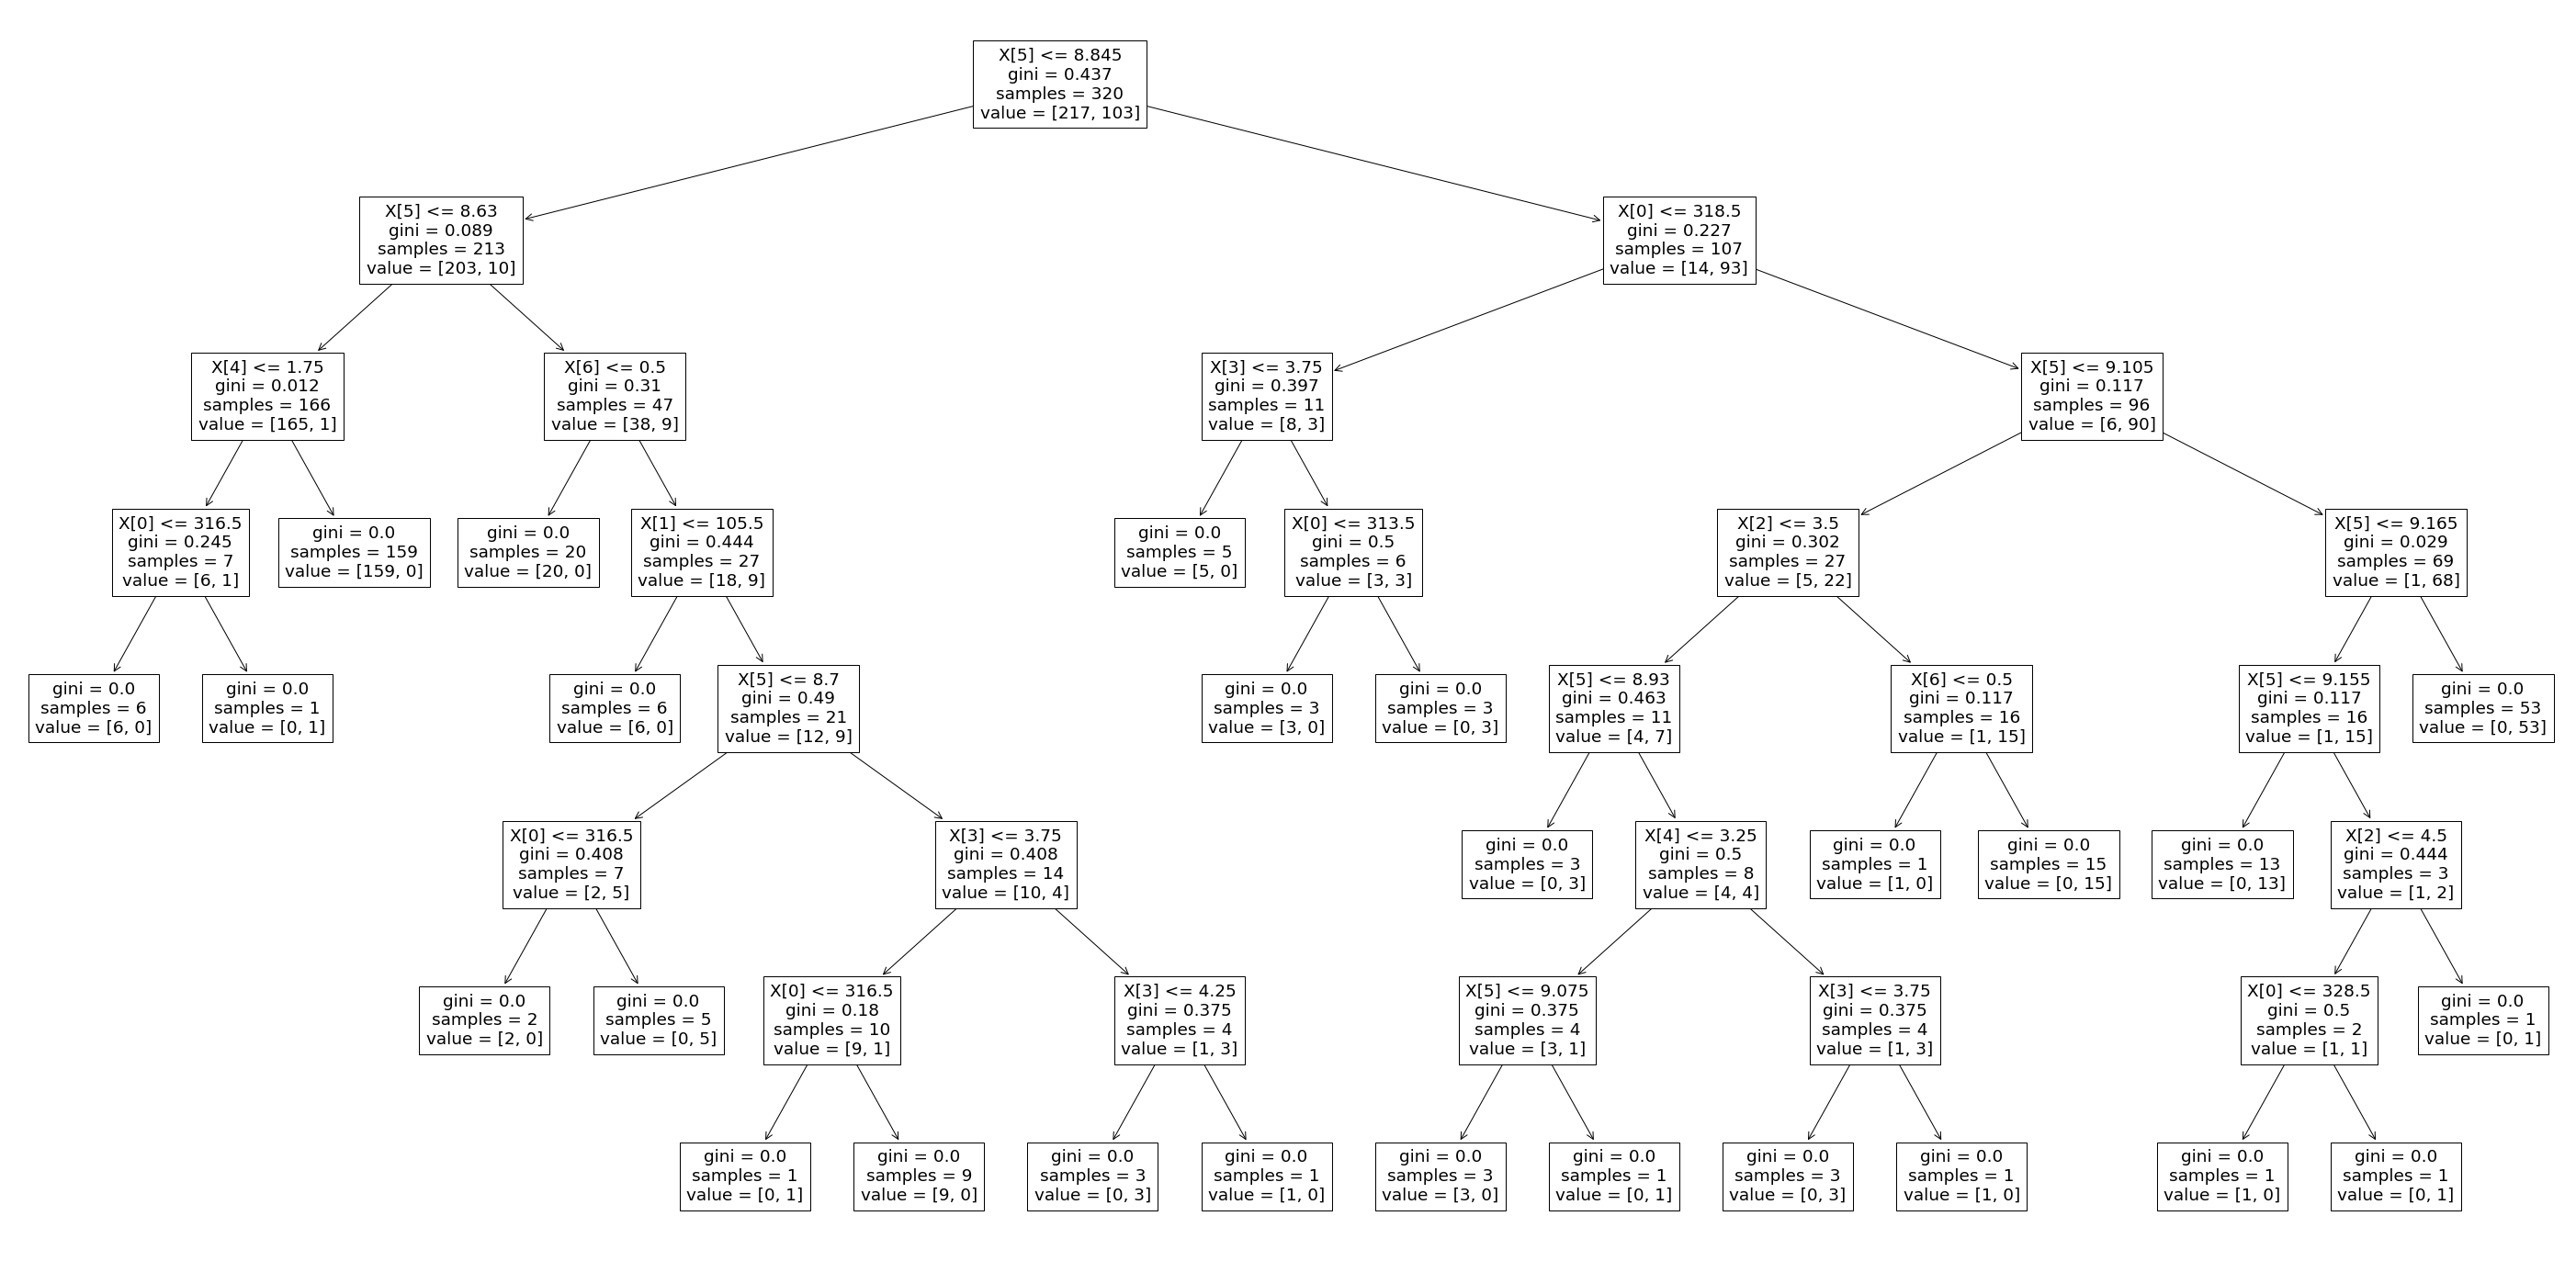

In [29]:
fig = plt.figure(figsize=(50,25))
_ = tree.plot_tree(model)

## 4. Evaluating the model

In [65]:
from sklearn import metrics

In [70]:
metrics.confusion_matrix(ytest, ypred)

array([[48,  7],
       [ 2, 23]], dtype=int64)

In [71]:
print("1. Accuracy Score:", metrics.accuracy_score(ytest, ypred))
print("2. Precision Score:",metrics.precision_score(ytest, ypred))
print("3. Recall Score:", metrics.recall_score(ytest, ypred))
print("4. f1 Score:", metrics.f1_score(ytest, ypred)) 

1. Accuracy Score: 0.8875
2. Precision Score: 0.7666666666666667
3. Recall Score: 0.92
4. f1 Score: 0.8363636363636363
